In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
from tqdm import tqdm

In [106]:
# Fetch NIFTY data
symbol = "^NSEI"
start_date = "2007-10-01"
end_date = "2024-09-30"

df = yf.download(symbol, start=start_date, end=end_date, interval="1d")
df.columns = [col[0] for col in df.columns]
df.head()

/tmp/ipython-input-106-330426161.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2007-10-01,5068.950195,5089.299805,5001.350098,5021.500000,0
2007-10-03,5210.799805,5261.350098,5034.149902,5069.000000,0
2007-10-04,5208.649902,5233.100098,5126.049805,5211.649902,0
2007-10-05,5185.850098,5248.549805,5164.500000,5208.149902,0
2007-10-08,5085.100098,5249.299805,5024.750000,5186.250000,0


# ***Exploratory Data Analysis***

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4165 entries, 2007-10-01 to 2024-09-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4165 non-null   float64
 1   High    4165 non-null   float64
 2   Low     4165 non-null   float64
 3   Open    4165 non-null   float64
 4   Volume  4165 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 195.2 KB


In [108]:
df.describe()

,Close,High,Low,Open,Volume
count,4165.000000,4165.000000,4165.000000,4165.000000,4.165000e+03
mean,9908.608346,9968.330109,9845.424807,9914.660528,2.045025e+05
std,5305.916192,5321.168722,5286.736719,5307.743888,2.095041e+05
min,2524.199951,2585.300049,2252.750000,2553.600098,0.000000e+00
25%,5574.049805,5624.399902,5537.049805,5577.000000,0.000000e+00
50%,8398.000000,8449.950195,8352.700195,8405.250000,1.761000e+05
75%,11921.500000,11978.950195,11861.900391,11934.900391,2.849000e+05
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


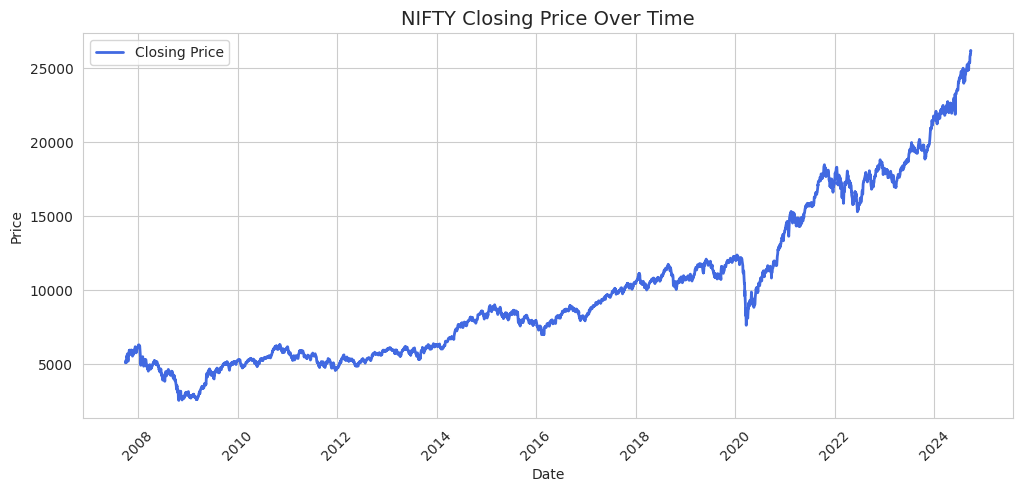

In [109]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))

plt.plot(df.index, df['Close'], label="Closing Price", color='royalblue', linewidth=2)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("NIFTY Closing Price Over Time", fontsize=14)
plt.legend(loc="upper left")
plt.xticks(rotation=45)

plt.show()

count    4164.000000
mean        0.000484
std         0.013356
min        -0.129805
25%        -0.005324
50%         0.000720
75%         0.006713
max         0.177441
Name: Returns, dtype: float64
Skewness: 0.0429
Kurtosis: 15.5925


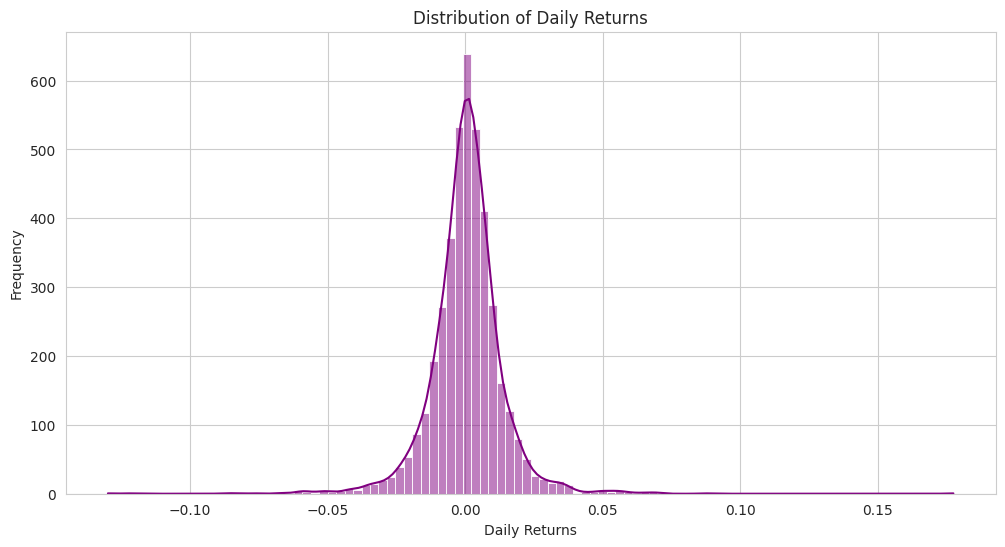

In [110]:
df['Returns'] = df['Close'].pct_change()
returns_summary = df['Returns'].describe()
print(returns_summary)

#skewness and kurtosis
skewness = df['Returns'].skew()
kurtosis = df['Returns'].kurtosis()
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

plt.figure(figsize=(12,6))
sns.histplot(df['Returns'].dropna(), bins=100, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()


In [111]:
# Calculate Moving Averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Crossover Signals
df['Signal'] = np.where(df['MA_50'] > df['MA_200'], 1, 0)
df['Crossover'] = df['Signal'].diff()
df.tail()

,Close,High,Low,Open,Volume,Returns,MA_50,MA_200,Signal,Crossover
Date,,,,,,,,,,
2024-09-23,25939.050781,25956.000000,25847.349609,25872.550781,209200,0.005742,24838.338984,22916.523213,1,0.0
2024-09-24,25940.400391,26011.550781,25886.849609,25921.449219,384100,0.000052,24867.103984,22945.559463,1,0.0
2024-09-25,26004.150391,26032.800781,25871.349609,25899.449219,278500,0.002458,24895.453008,22974.240713,1,0.0
2024-09-26,26216.050781,26250.900391,25998.400391,26005.400391,370900,0.008149,24927.514023,23001.886963,1,0.0
2024-09-27,26178.949219,26277.349609,26151.400391,26248.250000,490300,-0.001415,24955.076016,23028.506211,1,0.0


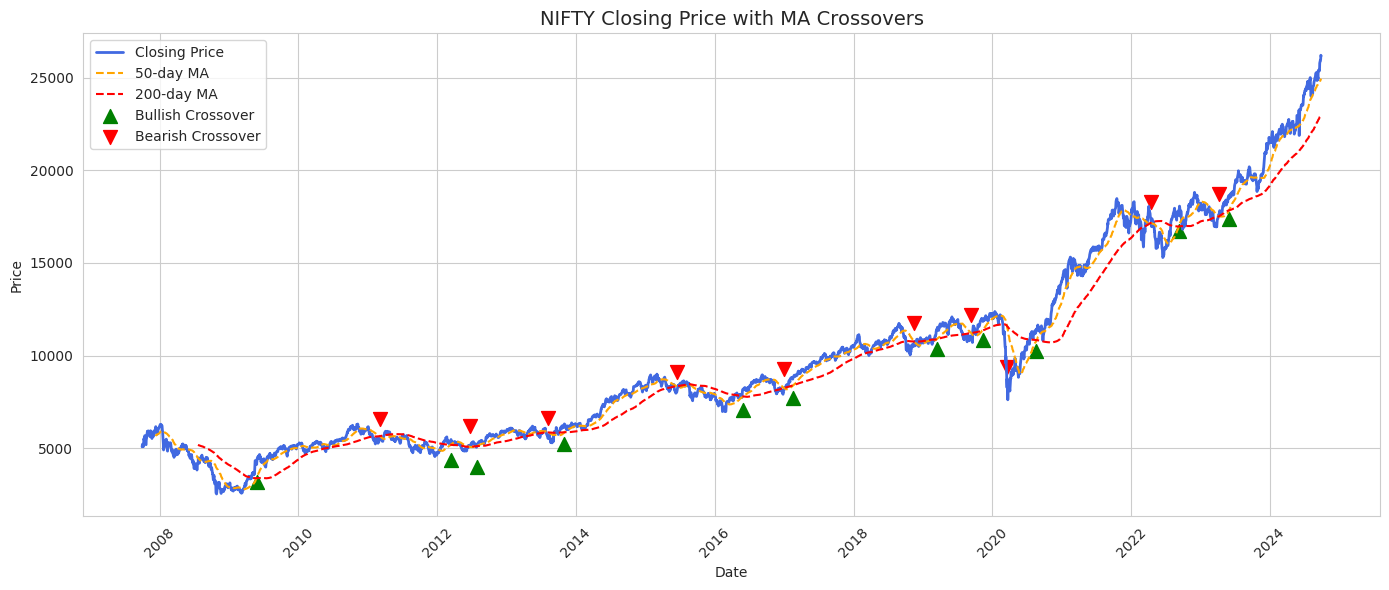

In [112]:
sns.set_style("whitegrid")

bullish = df[df['Crossover'] == 1]
bearish = df[df['Crossover'] == -1]

plt.figure(figsize=(14, 6))

plt.plot(df.index, df['Close'], label="Closing Price", color='royalblue', linewidth=2)

plt.plot(df.index, df['MA_50'], label="50-day MA", color='orange', linestyle='--', linewidth=1.5)
plt.plot(df.index, df['MA_200'], label="200-day MA", color='red', linestyle='--', linewidth=1.5)

arrow_offset = -1100

plt.scatter(bullish.index, bullish['Close'] + arrow_offset,
            marker='^', color='green', s=100, label='Bullish Crossover')

plt.scatter(bearish.index, bearish['Close'] - arrow_offset,
            marker='v', color='red', s=100, label='Bearish Crossover')

plt.title("NIFTY Closing Price with MA Crossovers", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

# ***Backtesting 50 & 200 SMA (Golden & Death Cross)***

In [113]:
df_backtest = df[['Close']].copy()

# Calculate SMAs
df_backtest['SMA_50'] = df_backtest['Close'].rolling(window=50).mean()
df_backtest['SMA_200'] = df_backtest['Close'].rolling(window=200).mean()

df_backtest['Signal'] = 0

# Buy signal
buy_signal = (df_backtest['SMA_50'] > df_backtest['SMA_200']) & \
             (df_backtest['SMA_50'].shift(1) <= df_backtest['SMA_200'].shift(1))

# Sell signal
sell_signal = (df_backtest['SMA_50'] < df_backtest['SMA_200']) & \
              (df_backtest['SMA_50'].shift(1) >= df_backtest['SMA_200'].shift(1))

df_backtest.loc[buy_signal, 'Signal'] = 1
df_backtest.loc[sell_signal, 'Signal'] = -1

df_backtest['Position'] = df_backtest['Signal'].replace(0, method='ffill')
df_backtest['Position'].fillna(0, inplace=True)

df_backtest['Returns'] = df_backtest['Close'].pct_change()

# Strategy return
df_backtest['Strategy_Returns'] = df_backtest['Returns'] * df_backtest['Position'].shift(1)

# Long-only and Short-only returns
df_backtest['Long_Only'] = df_backtest['Returns'] * (df_backtest['Position'].shift(1) == 1)
df_backtest['Short_Only'] = -df_backtest['Returns'] * (df_backtest['Position'].shift(1) == -1)

df_backtest.head()

/tmp/ipython-input-113-220225827.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df_backtest['Position'] = df_backtest['Signal'].replace(0, method='ffill')
/tmp/ipython-input-113-220225827.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backtest['Position'].fillna(0, inplace=True)


,Close,SMA_50,SMA_200,Signal,Position,Returns,Strategy_Returns,Long_Only,Short_Only
Date,,,,,,,,,
2007-10-01,5068.950195,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2007-10-03,5210.799805,NaN,NaN,0,0,0.027984,0.0,0.0,-0.0
2007-10-04,5208.649902,NaN,NaN,0,0,-0.000413,-0.0,-0.0,0.0
2007-10-05,5185.850098,NaN,NaN,0,0,-0.004377,-0.0,-0.0,0.0
2007-10-08,5085.100098,NaN,NaN,0,0,-0.019428,-0.0,-0.0,0.0


In [114]:
# Drop rows before first trade
first_trade_idx = df_backtest[df_backtest['Position'] != 0].first_valid_index()
df_bt_final = df_backtest.loc[first_trade_idx:].copy()

# Cumulative returns
df_bt_final['Cumulative_Strategy'] = (1 + df_bt_final['Strategy_Returns']).cumprod()
df_bt_final['Cumulative_BuyHold'] = (1 + df_bt_final['Returns']).cumprod()
df_bt_final['Cumulative_Long_Only'] = (1 + df_bt_final['Long_Only'].fillna(0)).cumprod()
df_bt_final['Cumulative_Short_Only'] = (1 + df_bt_final['Short_Only'].fillna(0)).cumprod()

df_bt_final.head()

,Close,SMA_50,SMA_200,Signal,Position,Returns,Strategy_Returns,Long_Only,Short_Only,Cumulative_Strategy,Cumulative_BuyHold,Cumulative_Long_Only,Cumulative_Short_Only
Date,,,,,,,,,,,,,
2009-05-27,4276.049805,3407.933984,3379.128486,1,1,0.038708,0.000000,0.000000,-0.0,1.000000,1.038708,1.000000,1.0
2009-05-28,4337.100098,3443.212988,3379.613486,0,1,0.014277,0.014277,0.014277,-0.0,1.014277,1.053538,1.014277,1.0
2009-05-29,4448.950195,3479.842993,3379.474238,0,1,0.025789,0.025789,0.025789,-0.0,1.040435,1.080708,1.040435,1.0
2009-06-01,4529.899902,3516.055991,3379.955989,0,1,0.018195,0.018195,0.018195,-0.0,1.059366,1.100372,1.059366,1.0
2009-06-02,4525.250000,3551.015991,3381.022988,0,1,-0.001026,-0.001026,-0.001026,0.0,1.058278,1.099242,1.058278,1.0


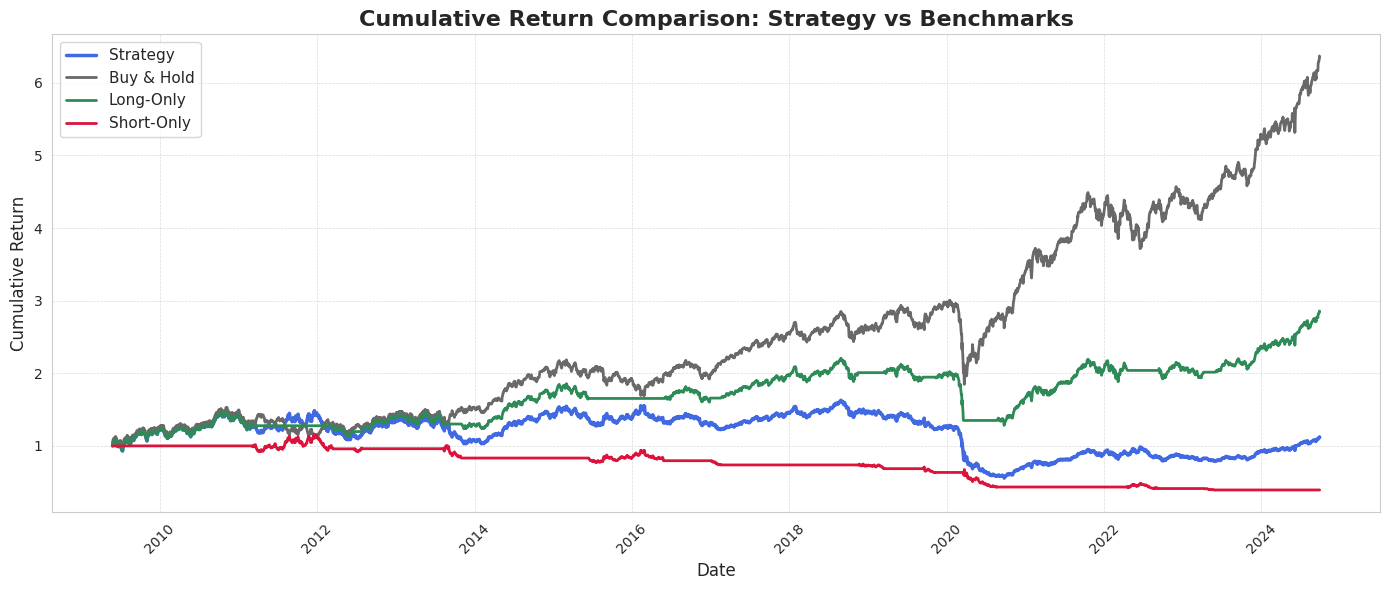

In [115]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

plt.plot(df_bt_final.index, df_bt_final['Cumulative_Strategy'],
         label='Strategy', color='royalblue', linewidth=2.5)

plt.plot(df_bt_final.index, df_bt_final['Cumulative_BuyHold'],
         label='Buy & Hold', color='dimgray', linewidth=2)

plt.plot(df_bt_final.index, df_bt_final['Cumulative_Long_Only'],
         label='Long-Only', color='seagreen', linewidth=2)

plt.plot(df_bt_final.index, df_bt_final['Cumulative_Short_Only'],
         label='Short-Only', color='crimson', linewidth=2)

plt.title('Cumulative Return Comparison: Strategy vs Benchmarks', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [116]:
def compute_trade_stats(df, return_col='Strategy_Returns', signal_col='Signal'):
    trades = []
    position = 0
    entry_price = None
    entry_date = None

    df = df.copy()
    df = df.sort_index()  # Ensure date order

    # Check if strategy starts in a position
    if df.iloc[0][signal_col] != 0:
        position = df.iloc[0][signal_col]
        entry_price = df.iloc[0]['Close']
        entry_date = df.index[0]

    for i in range(1, len(df)):
        row = df.iloc[i]
        current_signal = row[signal_col]

        # Entry if we're flat and now taking position
        if position == 0 and current_signal != 0:
            position = current_signal
            entry_price = row['Close']
            entry_date = row.name

        # Exit if position changes or goes flat
        elif position != 0 and current_signal != position:
            exit_price = row['Close']
            exit_date = row.name
            trade_return = (exit_price / entry_price - 1) * position

            trades.append({
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Position': position,
                'Entry Price': entry_price,
                'Exit Price': exit_price,
                'Return': trade_return * 100  # in %
            })

            # If signal immediately flips (e.g., long → short), re-enter
            if current_signal != 0:
                position = current_signal
                entry_price = row['Close']
                entry_date = row.name
            else:
                position = 0
                entry_price = None
                entry_date = None

    trades_df = pd.DataFrame(trades)
    return trades_df

In [117]:
# Strategy Trades
strategy_trades = compute_trade_stats(df_bt_final, return_col='Strategy_Returns', signal_col='Signal')

# Long-only Trades
long_trades = compute_trade_stats(df_bt_final[df_bt_final['Position'] == 1], return_col='Long_Only', signal_col='Signal')

# Short-only Trades
short_trades = compute_trade_stats(df_bt_final[df_bt_final['Position'] == -1], return_col='Short_Only', signal_col='Signal')
strategy_trades

,Entry Date,Exit Date,Position,Entry Price,Exit Price,Return
0,2009-05-27,2009-05-28,1.0,4276.049805,4337.100098,1.427726
1,2011-03-07,2011-03-08,-1.0,5463.149902,5520.799805,-1.055250
2,2012-03-14,2012-03-15,1.0,5463.899902,5380.500000,-1.526380
3,2012-06-20,2012-06-21,-1.0,5120.549805,5165.000000,-0.868075
4,2012-07-27,2012-07-30,1.0,5099.850098,5199.799805,1.959856
5,2013-08-06,2013-08-07,-1.0,5542.250000,5519.100098,0.417699
6,2013-11-01,2013-11-05,1.0,6307.200195,6253.149902,-0.856962
7,2015-06-15,2015-06-16,-1.0,8013.899902,8047.299805,-0.416775
8,2016-05-31,2016-06-01,1.0,8160.100098,8179.950195,0.243258
9,2016-12-30,2017-01-02,-1.0,8185.799805,8179.500000,0.076960


# ***Backtest Performance Evaluation***

---




In [118]:
def calculate_performance_table(trades_df, daily_returns):
    total_return = (1 + daily_returns).prod() - 1
    cagr = (1 + total_return) ** (252 / len(daily_returns)) - 1
    sharpe = daily_returns.mean() / daily_returns.std() * np.sqrt(252)

    gross_profit = trades_df[trades_df['Return'] > 0]['Return'].sum()
    gross_loss = trades_df[trades_df['Return'] < 0]['Return'].sum()
    profit_factor = abs(gross_profit / gross_loss) if gross_loss != 0 else np.inf
    percent_profitable = (trades_df['Return'] > 0).sum() / len(trades_df) * 100
    avg_trade_return = trades_df['Return'].mean()
    largest_win = trades_df['Return'].max()
    largest_loss = trades_df['Return'].min()

    return {
        'Net Profit (%)': round(total_return * 100, 2),
        'Gross Profit (%)': round(gross_profit, 2),
        'Gross Loss (%)': round(gross_loss, 2),
        'Profit Factor': round(profit_factor, 2),
        'Number of Trades': len(trades_df),
        'Percent Profitable': round(percent_profitable, 2),
        'Avg Trade Net Profit (%)': round(avg_trade_return, 2),
        'Largest Win (%)': round(largest_win, 2),
        'Largest Loss (%)': round(largest_loss, 2),
        'CAGR (%)': round(cagr * 100, 2),
        'Sharpe Ratio': round(sharpe, 2)
    }

In [119]:
def get_buyhold_stats(returns):
    total_return = (1 + returns).prod() - 1
    cagr = (1 + total_return) ** (252 / len(returns)) - 1
    sharpe = returns.mean() / returns.std() * np.sqrt(252)

    return {
        'Net Profit (%)': round(total_return * 100, 2),
        'CAGR (%)': round(cagr * 100, 2),
        'Sharpe Ratio': round(sharpe, 2),
        'Number of Trades': 1,
    }

In [120]:
buyhold_stats = get_buyhold_stats(df_bt_final['Returns'])

summary_df = pd.DataFrame([
    calculate_performance_table(strategy_trades, df_bt_final['Strategy_Returns']),
    calculate_performance_table(long_trades, df_bt_final['Long_Only']),
    calculate_performance_table(short_trades, df_bt_final['Short_Only']),
    buyhold_stats
], index=['Strategy', 'Long Only', 'Short Only', 'Buy & Hold'])
summary_df

,Net Profit (%),Gross Profit (%),Gross Loss (%),Profit Factor,Number of Trades,Percent Profitable,Avg Trade Net Profit (%),Largest Win (%),Largest Loss (%),CAGR (%),Sharpe Ratio
Strategy,12.19,8.65,-12.49,0.69,21,57.14,-0.18,1.96,-5.83,0.77,0.13
Long Only,185.35,6.25,-3.00,2.09,11,72.73,0.30,1.96,-1.53,7.27,0.59
Short Only,-60.68,2.40,-9.49,0.25,10,40.00,-0.71,1.25,-5.83,-6.06,-0.53
Buy & Hold,535.92,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,13.18,0.80


In [121]:
def calculate_max_drawdown(cumulative_returns):
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / rolling_max) - 1
    max_dd = drawdown.min() * 100  # in %
    return max_dd

In [122]:
strategy_dd = calculate_max_drawdown(df_bt_final['Cumulative_Strategy'])
long_dd = calculate_max_drawdown(df_bt_final['Cumulative_Long_Only'])
short_dd = calculate_max_drawdown(df_bt_final['Cumulative_Short_Only'])
buyhold_dd = calculate_max_drawdown(df_bt_final['Cumulative_BuyHold'])

In [123]:
summary_df['Max Drawdown (%)'] = [strategy_dd, long_dd, short_dd, buyhold_dd]
summary_df

,Net Profit (%),Gross Profit (%),Gross Loss (%),Profit Factor,Number of Trades,Percent Profitable,Avg Trade Net Profit (%),Largest Win (%),Largest Loss (%),CAGR (%),Sharpe Ratio,Max Drawdown (%)
Strategy,12.19,8.65,-12.49,0.69,21,57.14,-0.18,1.96,-5.83,0.77,0.13,-65.830687
Long Only,185.35,6.25,-3.00,2.09,11,72.73,0.30,1.96,-1.53,7.27,0.59,-41.863376
Short Only,-60.68,2.40,-9.49,0.25,10,40.00,-0.71,1.25,-5.83,-6.06,-0.53,-66.469038
Buy & Hold,535.92,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,13.18,0.80,-38.439852


# ***MA Optimization***


In [124]:
df_simple = df[['Close']].copy()

# Split into In-Sample (30%) and Out-of-Sample (70%)
total_len = len(df_simple)
split_index = int(total_len * 0.3)

df_insample = df_simple.iloc[:split_index].copy()
df_out_sample = df_simple.iloc[split_index:].copy()

df_insample.shape, df_out_sample.shape

((1249, 1), (2916, 1))

In [125]:
df_insample.head()

,Close
Date,
2007-10-01,5068.950195
2007-10-03,5210.799805
2007-10-04,5208.649902
2007-10-05,5185.850098
2007-10-08,5085.100098


In [126]:
ma_list = [3, 5, 8, 10, 13, 15, 20, 25, 30, 35, 40, 45, 50, 60, 75, 100, 125, 150, 175, 200, 250, 300]
ma_pairs = [(short, long) for i, short in enumerate(ma_list) for long in ma_list[i+1:]]
len(ma_pairs)

231

In [127]:
results = []

# Optimization loop
for short_ma in tqdm(ma_list):
    for long_ma in ma_list:
        if short_ma >= long_ma:
            continue  # Only valid pairs

        df_bt = df_insample[['Close']].copy()
        df_bt['SMA_Short'] = df_bt['Close'].rolling(window=short_ma).mean()
        df_bt['SMA_Long'] = df_bt['Close'].rolling(window=long_ma).mean()

        # Signal generation
        df_bt['Signal'] = 0
        buy = (df_bt['SMA_Short'] > df_bt['SMA_Long']) & (df_bt['SMA_Short'].shift(1) <= df_bt['SMA_Long'].shift(1))
        sell = (df_bt['SMA_Short'] < df_bt['SMA_Long']) & (df_bt['SMA_Short'].shift(1) >= df_bt['SMA_Long'].shift(1))
        df_bt.loc[buy, 'Signal'] = 1
        df_bt.loc[sell, 'Signal'] = -1

        position_series = df_bt['Signal'].replace(0, np.nan).ffill()
        df_bt['Position'] = position_series.fillna(0)

        # Returns
        df_bt['Returns'] = df_bt['Close'].pct_change()
        df_bt['Strategy_Returns'] = df_bt['Returns'] * df_bt['Position'].shift(1)

        # Drop rows before first trade
        first_trade = df_bt[df_bt['Position'] != 0].first_valid_index()
        if first_trade is None:
            continue
        df_bt = df_bt.loc[first_trade:].copy()

        # Cumulative returns
        df_bt['Cumulative_Strategy'] = (1 + df_bt['Strategy_Returns']).cumprod()

        # CAGR
        n_days = len(df_bt)
        if n_days == 0 or df_bt['Cumulative_Strategy'].iloc[-1] <= 0:
            continue
        cagr = df_bt['Cumulative_Strategy'].iloc[-1]**(252 / n_days) - 1

        # Sharpe
        sharpe = df_bt['Strategy_Returns'].mean() / df_bt['Strategy_Returns'].std() * np.sqrt(252) if df_bt['Strategy_Returns'].std() != 0 else 0

        # Max Drawdown
        roll_max = df_bt['Cumulative_Strategy'].cummax()
        drawdown = (df_bt['Cumulative_Strategy'] - roll_max) / roll_max
        max_dd = drawdown.min()

        results.append({
            'Short_MA': short_ma,
            'Long_MA': long_ma,
            'CAGR': round(cagr * 100, 2),
            'Sharpe': round(sharpe, 2),
            'Max_Drawdown (%)': round(max_dd * 100, 2)
        })

results_df = pd.DataFrame(results).sort_values(by='Sharpe', ascending=False)
display(results_df.head(10))  # Top 10 configs

100%|██████████| 22/22 [00:01<00:00, 12.49it/s]


,Short_MA,Long_MA,CAGR,Sharpe,Max_Drawdown (%)
213,100,200,17.00,0.91,-19.44
222,150,200,15.48,0.86,-21.61
218,125,200,15.69,0.86,-19.44
203,75,100,22.67,0.86,-26.69
208,75,250,15.08,0.83,-19.81
216,125,150,15.44,0.83,-21.92
214,100,250,14.40,0.81,-19.44
196,60,100,19.34,0.76,-33.32
198,60,150,14.24,0.72,-23.40
220,125,300,12.03,0.71,-19.44


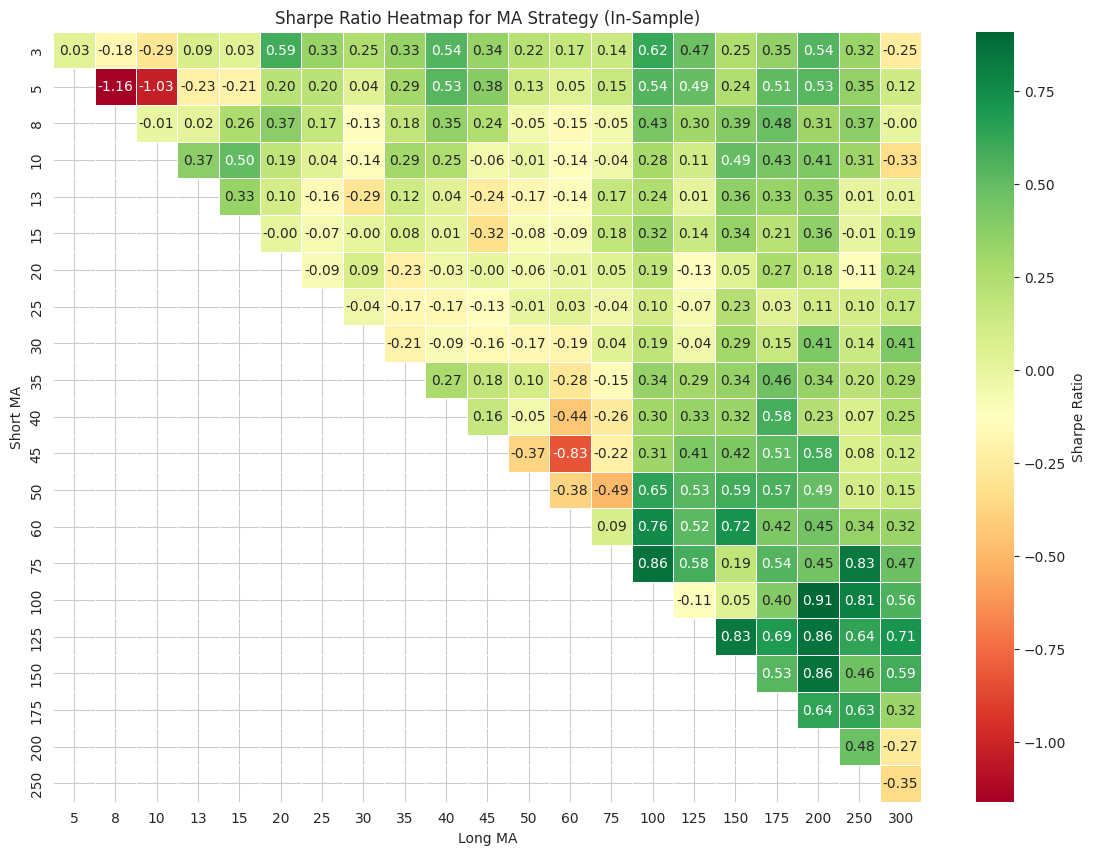

In [128]:
df_heatmap = pd.DataFrame(results)

# Pivot to create grid (Short_MA as rows, Long_MA as columns)
heatmap_data = df_heatmap.pivot(index='Short_MA', columns='Long_MA', values='Sharpe')

heatmap_data = heatmap_data.sort_index(ascending=True)
heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5, cbar_kws={'label': 'Sharpe Ratio'})
plt.title("Sharpe Ratio Heatmap for MA Strategy (In-Sample)")
plt.xlabel("Long MA")
plt.ylabel("Short MA")
plt.show()

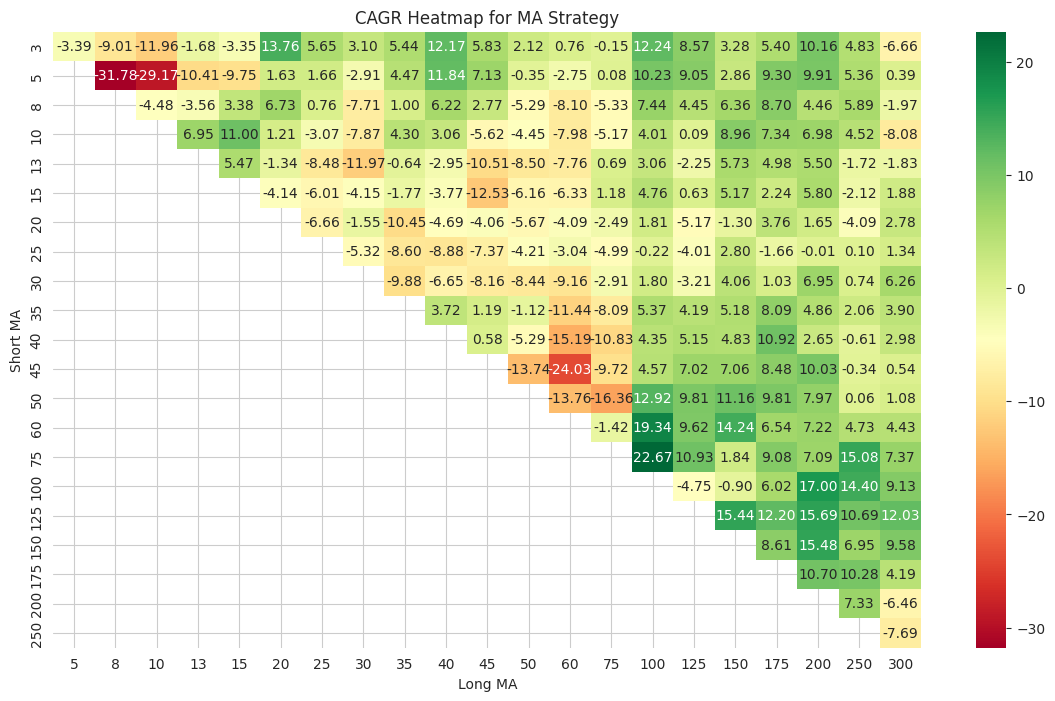

In [129]:
cagr_data = df_heatmap.pivot(index='Short_MA', columns='Long_MA', values='CAGR')


plt.figure(figsize=(14, 8))
sns.heatmap(cagr_data, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("CAGR Heatmap for MA Strategy")
plt.xlabel("Long MA")
plt.ylabel("Short MA")
plt.show()

In [130]:
# Sort results by Sharpe Ratio (descending), then by CAGR (descending), and MDD (ascending)
sorted_results = pd.DataFrame(results)
sorted_results = sorted_results.sort_values(
    by=['Sharpe', 'CAGR', 'Max_Drawdown (%)'],
    ascending=[False, False, True]
)

sorted_results.head(10)

,Short_MA,Long_MA,CAGR,Sharpe,Max_Drawdown (%)
213,100,200,17.00,0.91,-19.44
203,75,100,22.67,0.86,-26.69
218,125,200,15.69,0.86,-19.44
222,150,200,15.48,0.86,-21.61
216,125,150,15.44,0.83,-21.92
208,75,250,15.08,0.83,-19.81
214,100,250,14.40,0.81,-19.44
196,60,100,19.34,0.76,-33.32
198,60,150,14.24,0.72,-23.40
220,125,300,12.03,0.71,-19.44


# ***Out-of-Sample Performance Evaluation***


In [131]:
df_out_sample.head()

,Close
Date,
2012-11-09,5686.250000
2012-11-12,5683.700195
2012-11-15,5631.000000
2012-11-16,5574.049805
2012-11-19,5571.399902


In [146]:
df_out_sample['SMA_75'] = df_out_sample['Close'].rolling(window=75).mean()
df_out_sample['SMA_250'] = df_out_sample['Close'].rolling(window=250).mean()

df_out_sample['Signal'] = 0

# Buy signal
buy_signal = (df_out_sample['SMA_75'] > df_out_sample['SMA_250']) & \
             (df_out_sample['SMA_75'].shift(1) <= df_out_sample['SMA_250'].shift(1))

# Sell signal
sell_signal = (df_out_sample['SMA_75'] < df_out_sample['SMA_250']) & \
              (df_out_sample['SMA_75'].shift(1) >= df_out_sample['SMA_250'].shift(1))

df_out_sample.loc[buy_signal, 'Signal'] = 1
df_out_sample.loc[sell_signal, 'Signal'] = -1

df_out_sample['Position'] = df_out_sample['Signal'].replace(0, method='ffill')
df_out_sample['Position'].fillna(0, inplace=True)

df_out_sample['Returns'] = df_out_sample['Close'].pct_change()

# Strategy return
df_out_sample['Strategy_Returns'] = df_out_sample['Returns'] * df_out_sample['Position'].shift(1)

# Long-only and Short-only returns
df_out_sample['Long_Only'] = df_out_sample['Returns'] * (df_out_sample['Position'].shift(1) == 1)
df_out_sample['Short_Only'] = -df_out_sample['Returns'] * (df_out_sample['Position'].shift(1) == -1)

df_out_sample.head()

/tmp/ipython-input-146-989773907.py:17: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df_out_sample['Position'] = df_out_sample['Signal'].replace(0, method='ffill')
/tmp/ipython-input-146-989773907.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_out_sample['Position'].fillna(0, inplace=True)


,Close,SMA_75,SMA_250,Signal,Position,Returns,Strategy_Returns,Long_Only,Short_Only
Date,,,,,,,,,
2012-11-09,5686.250000,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2012-11-12,5683.700195,NaN,NaN,0,0,-0.000448,-0.0,-0.0,0.0
2012-11-15,5631.000000,NaN,NaN,0,0,-0.009272,-0.0,-0.0,0.0
2012-11-16,5574.049805,NaN,NaN,0,0,-0.010114,-0.0,-0.0,0.0
2012-11-19,5571.399902,NaN,NaN,0,0,-0.000475,-0.0,-0.0,0.0


In [147]:
# Drop rows before first trade
first_trade_idx = df_out_sample[df_out_sample['Position'] != 0].first_valid_index()
df_bt_oos = df_out_sample.loc[first_trade_idx:].copy()

# Cumulative returns
df_bt_oos['Cumulative_Strategy'] = (1 + df_bt_oos['Strategy_Returns']).cumprod()
df_bt_oos['Cumulative_BuyHold'] = (1 + df_bt_oos['Returns']).cumprod()
df_bt_oos['Cumulative_Long_Only'] = (1 + df_bt_oos['Long_Only'].fillna(0)).cumprod()
df_bt_oos['Cumulative_Short_Only'] = (1 + df_bt_oos['Short_Only'].fillna(0)).cumprod()

df_bt_oos.head()

,Close,SMA_75,SMA_250,Signal,Position,Returns,Strategy_Returns,Long_Only,Short_Only,Cumulative_Strategy,Cumulative_BuyHold,Cumulative_Long_Only,Cumulative_Short_Only
Date,,,,,,,,,,,,,
2013-11-27,6057.100098,5877.544681,5877.161201,1,1,-0.000330,-0.000000,-0.000000,0.0,1.000000,0.999670,1.000000,1.0
2013-11-28,6091.850098,5884.872682,5879.017602,0,1,0.005737,0.005737,0.005737,-0.0,1.005737,1.005405,1.005737,1.0
2013-11-29,6176.100098,5893.632682,5881.215602,0,1,0.013830,0.013830,0.013830,-0.0,1.019646,1.019310,1.019646,1.0
2013-12-02,6217.850098,5902.328685,5883.543402,0,1,0.006760,0.006760,0.006760,-0.0,1.026539,1.026200,1.026539,1.0
2013-12-03,6201.850098,5910.188021,5885.441002,0,1,-0.002573,-0.002573,-0.002573,0.0,1.023898,1.023560,1.023898,1.0


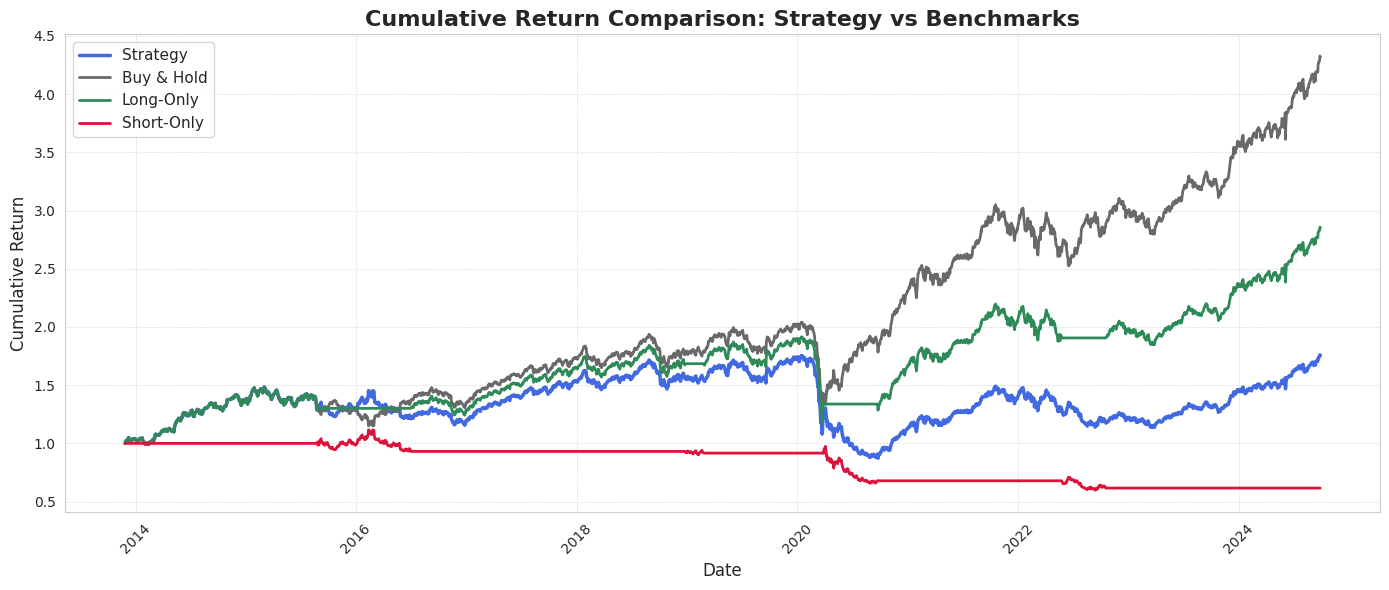

In [148]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

plt.plot(df_bt_oos.index, df_bt_oos['Cumulative_Strategy'],
         label='Strategy', color='royalblue', linewidth=2.5)

plt.plot(df_bt_oos.index, df_bt_oos['Cumulative_BuyHold'],
         label='Buy & Hold', color='dimgray', linewidth=2)

plt.plot(df_bt_oos.index, df_bt_oos['Cumulative_Long_Only'],
         label='Long-Only', color='seagreen', linewidth=2)

plt.plot(df_bt_oos.index, df_bt_oos['Cumulative_Short_Only'],
         label='Short-Only', color='crimson', linewidth=2)

plt.title('Cumulative Return Comparison: Strategy vs Benchmarks', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [149]:
# Strategy Trades
strategy_oos_trades = compute_trade_stats(df_bt_oos, return_col='Strategy_Returns', signal_col='Signal')

# Long-only Trades
long_oos_trades = compute_trade_stats(df_bt_oos[df_bt_oos['Position'] == 1], return_col='Long_Only', signal_col='Signal')

# Short-only Trades
short_oos_trades = compute_trade_stats(df_bt_oos[df_bt_oos['Position'] == -1], return_col='Short_Only', signal_col='Signal')
strategy_oos_trades

,Entry Date,Exit Date,Position,Entry Price,Exit Price,Return
0,2013-11-27,2013-11-28,1.0,6057.100098,6091.850098,0.573707
1,2015-08-25,2015-08-26,-1.0,7880.700195,7791.850098,1.127439
2,2016-06-30,2016-07-01,1.0,8287.750000,8328.349609,0.489875
3,2018-12-26,2018-12-27,-1.0,10729.849609,10779.799805,-0.465526
4,2019-02-25,2019-02-26,1.0,10880.099609,10835.299805,-0.411759
5,2020-03-26,2020-03-27,-1.0,8641.450195,8660.250000,-0.217554
6,2020-09-21,2020-09-22,1.0,11250.549805,11153.650391,-0.861286
7,2022-05-25,2022-05-26,-1.0,16025.799805,16170.150391,-0.900739
8,2022-10-18,2022-10-19,1.0,17486.949219,17512.250000,0.144684


In [150]:
summary_oos_df = pd.DataFrame([
    calculate_performance_table(strategy_oos_trades, df_bt_oos['Strategy_Returns']),
    calculate_performance_table(long_oos_trades, df_bt_oos['Long_Only']),
    calculate_performance_table(short_oos_trades, df_bt_oos['Short_Only']),
    buyhold_stats
], index=['Strategy', 'Long Only', 'Short Only', 'Buy & Hold'])

In [151]:
strategy_oos_dd = calculate_max_drawdown(df_bt_oos['Cumulative_Strategy'])
long_oos_dd = calculate_max_drawdown(df_bt_oos['Cumulative_Long_Only'])
short_oos_dd = calculate_max_drawdown(df_bt_oos['Cumulative_Short_Only'])
buyhold_oos_dd = calculate_max_drawdown(df_bt_oos['Cumulative_BuyHold'])
summary_oos_df['Max Drawdown (%)'] = [strategy_oos_dd, long_oos_dd, short_oos_dd, buyhold_oos_dd]
summary_oos_df

,Net Profit (%),Gross Profit (%),Gross Loss (%),Profit Factor,Number of Trades,Percent Profitable,Avg Trade Net Profit (%),Largest Win (%),Largest Loss (%),CAGR (%),Sharpe Ratio,Max Drawdown (%)
Strategy,75.81,2.34,-2.86,0.82,9,44.44,-0.06,1.13,-0.90,5.49,0.41,-50.273506
Long Only,185.30,1.21,-1.27,0.95,5,60.00,-0.01,0.57,-0.86,10.44,0.77,-38.439852
Short Only,-38.37,1.13,-1.58,0.71,4,25.00,-0.11,1.13,-0.90,-4.48,-0.53,-46.436928
Buy & Hold,535.92,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,13.18,0.80,-38.439852


In [152]:
summary_df

,Net Profit (%),Gross Profit (%),Gross Loss (%),Profit Factor,Number of Trades,Percent Profitable,Avg Trade Net Profit (%),Largest Win (%),Largest Loss (%),CAGR (%),Sharpe Ratio,Max Drawdown (%)
Strategy,12.19,8.65,-12.49,0.69,21,57.14,-0.18,1.96,-5.83,0.77,0.13,-65.830687
Long Only,185.35,6.25,-3.00,2.09,11,72.73,0.30,1.96,-1.53,7.27,0.59,-41.863376
Short Only,-60.68,2.40,-9.49,0.25,10,40.00,-0.71,1.25,-5.83,-6.06,-0.53,-66.469038
Buy & Hold,535.92,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,13.18,0.80,-38.439852
